In [83]:
# Libbreries
import pandas as pd
import numpy as np
import seaborn as sns

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             recall_score,
                             precision_score,
                             roc_auc_score,
                             classification_report,
                             ConfusionMatrixDisplay
                             )
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (OneHotEncoder,
                                   MinMaxScaler,
                                   LabelEncoder
                                  )
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (GradientBoostingClassifier,
                              RandomForestClassifier
                             )
from sklearn.tree import DecisionTreeClassifier

In [10]:
# DB
url = 'https://raw.githubusercontent.com/selva86/' + \
'datasets/master/orange_juice_withmissing.csv'

df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [11]:
df_raw.sample(5)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
856,CH,246,1.0,1.86,2.09,0.0,0.0,0.0,0.0,0.946313,2.09,1.86,0.23,No,0.000000,0.0,0.23,1.0
269,MM,261,2.0,1.86,2.18,0.0,0.0,0.0,0.0,0.533760,2.18,1.86,0.32,No,0.000000,0.0,0.32,2.0
733,MM,230,1.0,1.69,1.69,0.0,0.2,0.0,0.0,0.307200,1.49,1.69,-0.20,No,0.118343,0.0,0.00,1.0
1014,CH,234,1.0,1.69,1.99,0.0,0.0,0.0,0.0,0.857394,1.99,1.69,0.30,No,0.000000,0.0,0.30,1.0
416,MM,244,7.0,1.86,2.09,0.0,0.2,0.0,0.0,0.093024,1.89,1.86,0.03,Yes,0.095694,0.0,0.23,0.0


- If you use a linear regression or logistic regression algorithm, linear combination variables cannot exist => it is recommended to remove them
- For other types of models, they can be kept

In [12]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ','_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1
    )
    .drop(
        ['store','pctdiscch','pctdiscmm',
         'pricediff','listpricediff'], axis=1
    )
    .rename(columns={'purchase':'target'})
    .astype({'target':'category',
             'storeid':'category',
             'store7':'category',
             'specialch':'category',
             'specialmm': 'category'
    }))

In [13]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   target          1070 non-null   category
 1   weekofpurchase  1070 non-null   int64   
 2   storeid         1069 non-null   category
 3   pricech         1069 non-null   float64 
 4   pricemm         1066 non-null   float64 
 5   discch          1068 non-null   float64 
 6   discmm          1066 non-null   float64 
 7   specialch       1068 non-null   category
 8   specialmm       1065 non-null   category
 9   loyalch         1065 non-null   float64 
 10  salepricemm     1065 non-null   float64 
 11  salepricech     1069 non-null   float64 
 12  store7          1070 non-null   category
dtypes: category(5), float64(7), int64(1)
memory usage: 72.9 KB


In [14]:
df = df_interim.copy()
df_train, df_test = train_test_split(df, test_size= 0.2, random_state= 2024, stratify=df['target'])

In [15]:
display(df_train.describe(include= 'number').T)
display(df_train.describe(include= 'category').T)

,count,mean,std,min,25%,50%,75%,max
weekofpurchase,856.0,254.553738,15.452002,227.000000,240.00,257.000000,268.000000,278.000000
pricech,856.0,1.869661,0.101328,1.690000,1.79,1.860000,1.990000,2.090000
pricemm,854.0,2.086792,0.133189,1.690000,1.99,2.090000,2.180000,2.290000
discch,854.0,0.050328,0.115144,0.000000,0.00,0.000000,0.000000,0.500000
discmm,853.0,0.126166,0.213678,0.000000,0.00,0.000000,0.240000,0.800000
loyalch,854.0,0.562177,0.309084,0.000011,0.32,0.590665,0.843288,0.999947
salepricemm,851.0,1.960646,0.253729,1.190000,1.69,2.090000,2.180000,2.290000
salepricech,855.0,1.819404,0.142025,1.390000,1.75,1.860000,1.890000,2.090000


,count,unique,top,freq
target,856,2,CH,522
storeid,856.0,5.0,7.0,274.0
specialch,854.0,2.0,0.0,732.0
specialmm,852.0,2.0,0.0,711.0
store7,856,2,No,582


#### Analysis num variables
- discch have a Zero inflated is most probability than 5% of data is different = 0.5 => NOT a good predictor
- discmm have Zero inflated maybe 25% data is different > 0.24 => NOT a best predictor
- Verify the NaN data, if there is little data, it can be eliminated, otherwise make an imputation

#### Analysis cat variables
- CH represents 61% of the data, very high vs MM
- storeid the most frequent is 7
- the value of store7 is reflected in storeid

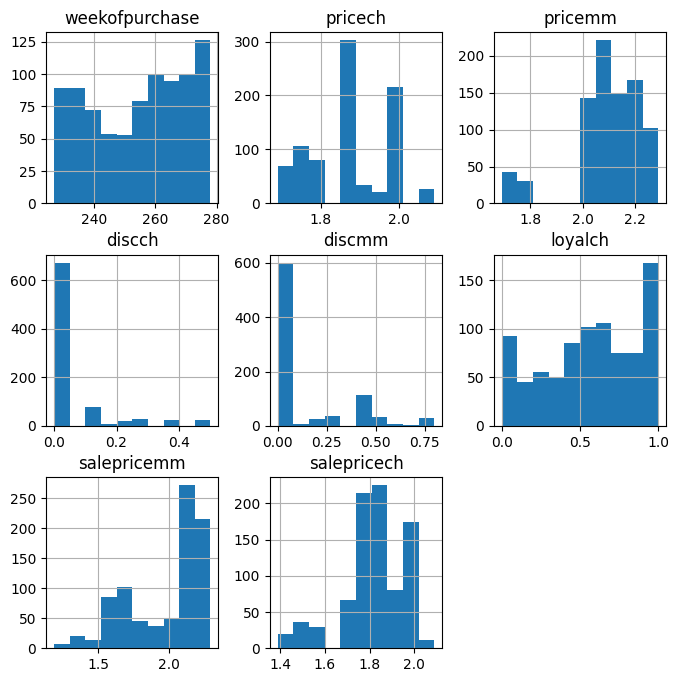

In [16]:
# Step 3.1: Univariate 
df_train.hist(figsize= (8, 8))
plt.show()

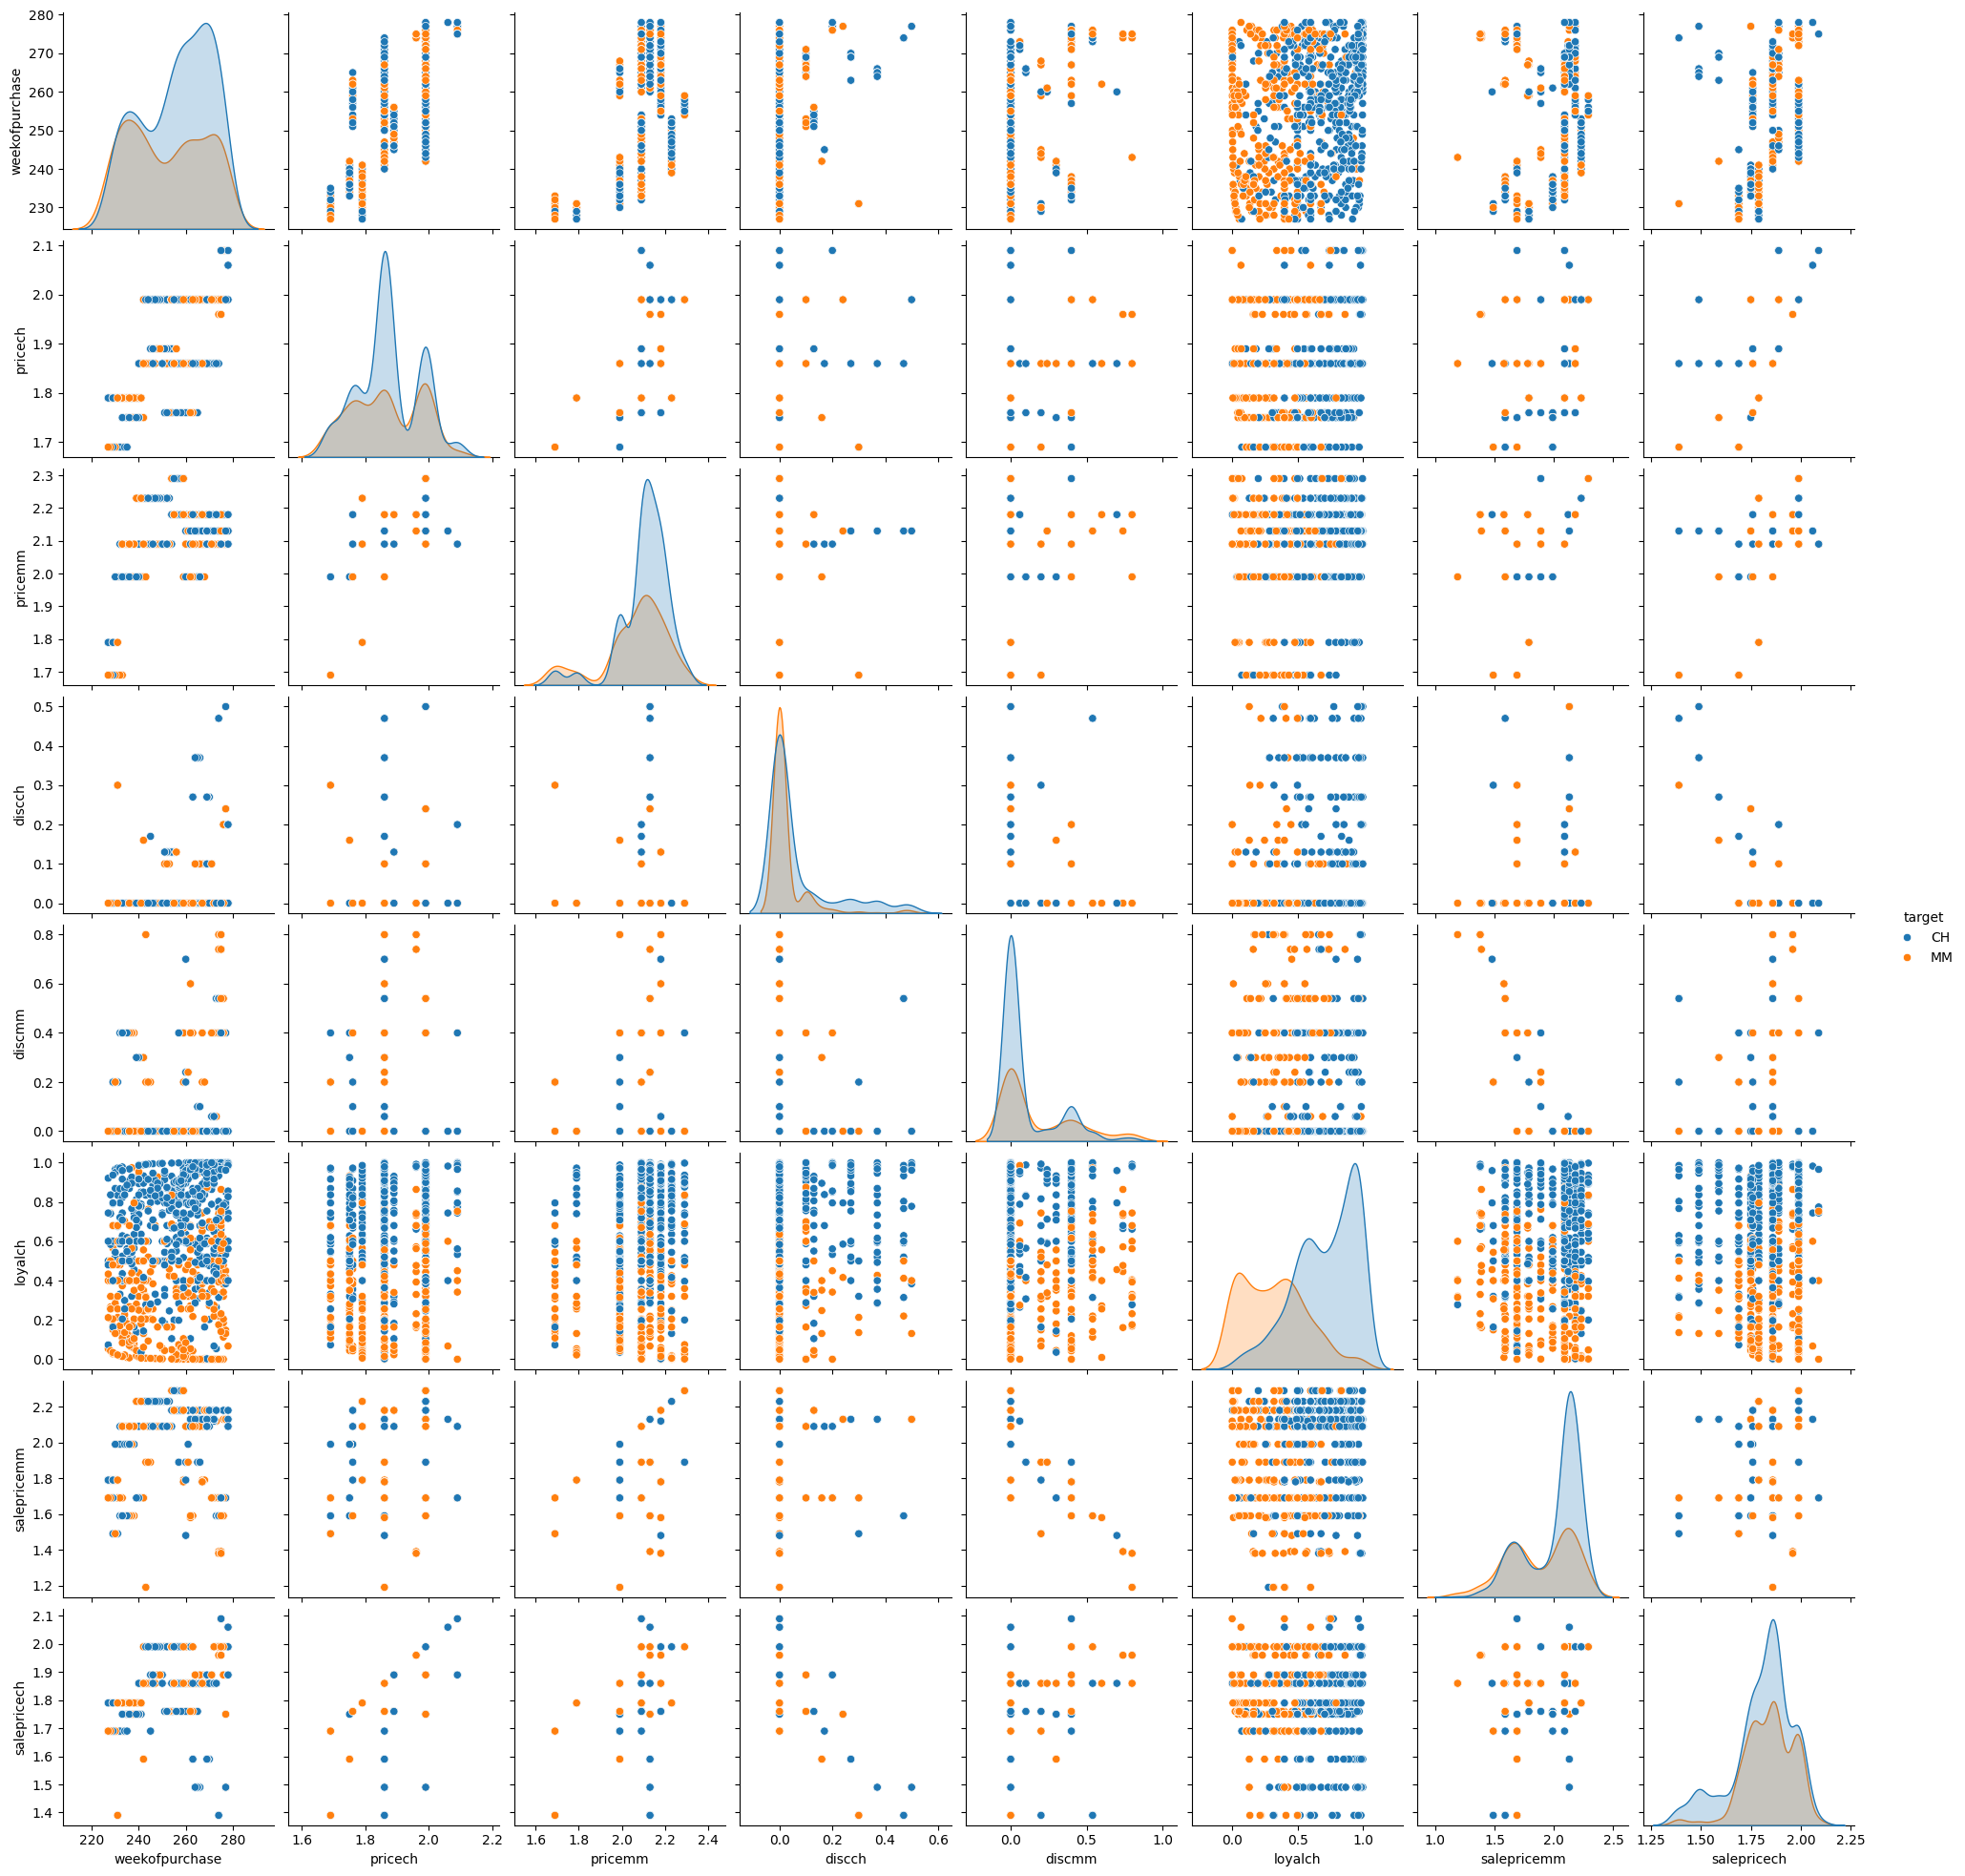

In [17]:
sns.pairplot(data= df_train, hue= 'target')
plt.show()

- 'loyalch' is most likely to be good for separating the type of oranges

In [18]:
df_train.select_dtypes('number').corr()

,weekofpurchase,pricech,pricemm,discch,discmm,loyalch,salepricemm,salepricech
weekofpurchase,1.000000,0.700162,0.574812,0.351151,0.223043,0.215882,0.116589,0.215175
pricech,0.700162,1.000000,0.607806,0.144142,0.111244,0.110543,0.224069,0.597417
pricemm,0.574812,0.607806,1.000000,0.055475,-0.022067,0.146806,0.539692,0.388985
discch,0.351151,0.144142,0.055475,1.000000,0.000554,0.132950,0.027725,-0.708023
discmm,0.223043,0.111244,-0.022067,0.000554,1.000000,-0.024437,-0.851833,0.078666
loyalch,0.215882,0.110543,0.146806,0.132950,-0.024437,1.000000,0.096795,-0.029675
salepricemm,0.116589,0.224069,0.539692,0.027725,-0.851833,0.096795,1.000000,0.137909
salepricech,0.215175,0.597417,0.388985,-0.708023,0.078666,-0.029675,0.137909,1.000000


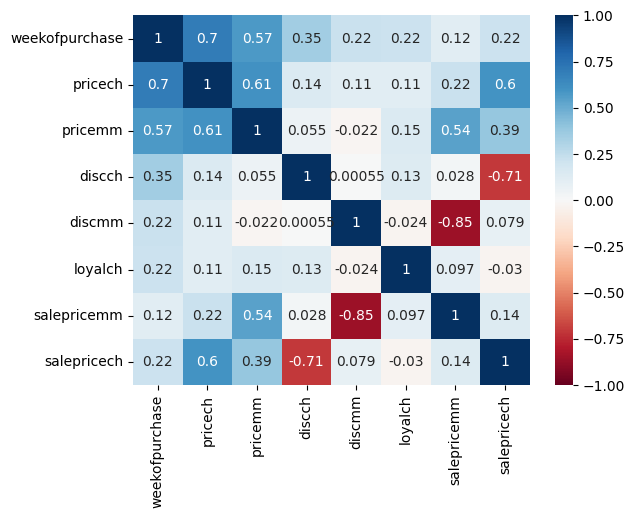

In [19]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin= -1, vmax= 1, annot= True, cmap="RdBu")
plt.show()

In [20]:
# Model ML
X_train = df_train.drop('target', axis=1).reset_index(drop= True)
y_train = df_train['target'].reset_index(drop= True)
X_test = df_test.drop('target', axis=1).reset_index(drop= True)
y_test = df_test['target'].reset_index(drop= True)

In [41]:
label_enc = LabelEncoder()
y_train_enc = label_enc.fit_transform(y_train)
y_test_enc = label_enc.transform(y_test)

In [21]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

In [22]:
cat_proc = Pipeline([
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) # ignore unknow
])
num_proc = Pipeline([
    ('nimputer', SimpleImputer(strategy= 'mean')),
    ('scaler', MinMaxScaler())
])
processor = ColumnTransformer([
    ('cat', cat_proc, cat_cols),
    ('num', num_proc, num_cols)
])

In [101]:
clf_knn = Pipeline([
    ('proc', processor),
    ('knn', KNeighborsClassifier())
])

In [102]:
clf_knn.fit(X_train, y_train_enc)

Pipeline(steps=[('proc',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['storeid', 'specialch', 'specialmm', 'store7'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('nimputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['weekofpurchase', 'pricech', 'pricemm', 'discch', 'discmm', 'loyalch',
       'salepricemm', 'salepricech'],
      dtype='object'))])),
                ('knn', KNeighborsClassifier())])

In [105]:
y_pred_knn = clf_knn.predict(X_test)
y_pred_score_knn = clf_knn.predict_proba(X_test) # Returns the probability of an event occurring

In [106]:
y_pred_knn

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [104]:
y_pred_score_knn

array([[0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0.4,

In [110]:
# Evaluate KNN

accuracy_knn = accuracy_score(y_test_enc, y_pred_knn)
print(f'Accuracy: {accuracy_knn}')

recall_knn = recall_score(y_test_enc, y_pred_knn)
print(f'recall: {recall_knn}')

precission_knn = precision_score(y_test_enc, y_pred_knn)
print(f'precission: {precission_knn}')

conf_matrix_knn = confusion_matrix(y_test_enc, y_pred_knn)
print(f'Confussion_matrix: {conf_matrix_knn}')

roc_auc_knn = roc_auc_score(y_test_enc, y_pred_score_knn[:,1])
print(f'roc_auc: {roc_auc_knn}')

class_report_knn = classification_report(y_test_enc, y_pred_knn)
print(f'Classification_report_knn: {class_report_knn}')

Accuracy: 0.822429906542056
recall: 0.6867469879518072
precission: 0.8260869565217391
Confussion_matrix: [[119  12]
 [ 26  57]]
roc_auc: 0.8946472914558999
Classification_report_knn:               precision    recall  f1-score   support

           0       0.82      0.91      0.86       131
           1       0.83      0.69      0.75        83

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.81       214
weighted avg       0.82      0.82      0.82       214



- Calculate precission and recall when we have a disbalance data set in y. Use confussion Matrix
- Necesito una columna para calcular roc_auc

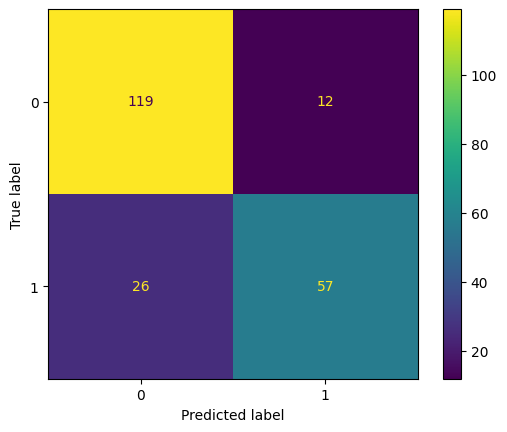

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix_knn)
disp.plot()

plt.show()

### Naive Bayes

In [54]:
clf_nb = Pipeline([
    ('proc', processor),
    ('knn', GaussianNB())
])

In [56]:
clf_nb.fit(X_train, y_train_enc)

Pipeline(steps=[('proc',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['storeid', 'specialch', 'specialmm', 'store7'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('nimputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['weekofpurchase', 'pricech', 'pricemm', 'discch', 'discmm', 'loyalch',
       'salepricemm', 'salepricech'],
      dtype='object'))])),
                ('knn', GaussianNB())])

In [89]:
y_pred_nb = clf_nb.predict(X_test)
y_pred_score_nb = clf_nb.predict_proba(X_test) 
y_pred_nb

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [98]:
# Evaluate NB
print("Evaluate NB")

accuracy_nb = accuracy_score(y_test_enc, y_pred_nb)
print(f'Accuracy: {accuracy_nb}')

recall_nb = recall_score(y_test_enc, y_pred_nb)
print(f'recall: {recall_nb}')

precission_nb = precision_score(y_test_enc, y_pred_nb)
print(f'precission: {precission_nb}')

conf_matrix_nb = confusion_matrix(y_test_enc, y_pred_nb)
print(f'Confussion_matrix: {conf_matrix_nb}')

roc_auc_nb = roc_auc_score(y_test_enc, y_pred_score_nb[:, 1])
print(f'roc_auc: {roc_auc_nb}')

class_report_nb = classification_report(y_test_enc, y_pred_nb)
print(f'Classification_report_nb: {class_report_nb}')


Evaluate NB
Accuracy: 0.7897196261682243
recall: 0.7951807228915663
precission: 0.7021276595744681
Confussion_matrix: [[103  28]
 [ 17  66]]
roc_auc: 0.8883472822588062
Classification_report_nb:               precision    recall  f1-score   support

           0       0.86      0.79      0.82       131
           1       0.70      0.80      0.75        83

    accuracy                           0.79       214
   macro avg       0.78      0.79      0.78       214
weighted avg       0.80      0.79      0.79       214



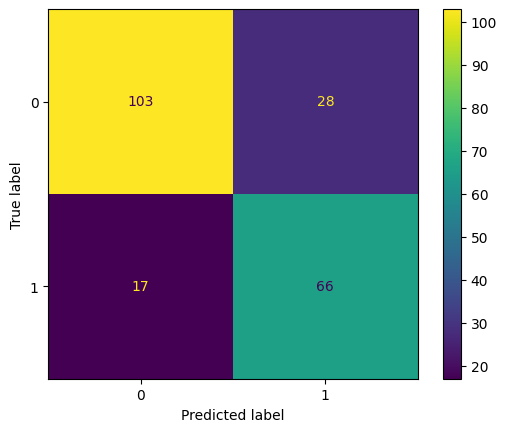

In [94]:
disp_nb = ConfusionMatrixDisplay(confusion_matrix= conf_matrix_nb)
disp_nb.plot()

plt.show()

#### Model GBS

In [66]:
clf_gbs = Pipeline([
    ('proc', processor),
    ('knn', GradientBoostingClassifier())
])

In [67]:
clf_gbs.fit(X_train, y_train_enc)

Pipeline(steps=[('proc',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['storeid', 'specialch', 'specialmm', 'store7'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('nimputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['weekofpurchase', 'pricech', 'pricemm', 'discch', 'discmm', 'loyalch',
       'salepricemm', 'salepricech'],
      dtype='object'))])),
                ('knn', GradientBoostingClassifier())])

In [92]:
y_pred_gbs = clf_gbs.predict(X_test)
y_pred_score_gbs = clf_gbs.predict_proba(X_test)
y_pred_gbs

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [97]:
# Evaluate GBS
print("Evaluate GBS")

accuracy_gbs = accuracy_score(y_test_enc, y_pred_gbs)
print(f'Accuracy: {accuracy_gbs}')

recall_gbs = recall_score(y_test_enc, y_pred_gbs)
print(f'recall: {recall_nb}')

precission_gbs = precision_score(y_test_enc, y_pred_gbs)
print(f'precission: {precission_nb}')

conf_matrix_gbs = confusion_matrix(y_test_enc, y_pred_gbs)
print(f'Confussion_matrix: {conf_matrix_nb}')

roc_auc_gbs = roc_auc_score(y_test_enc, y_pred_score_gbs[:, 1])
print(f'roc_auc: {roc_auc_nb}')

class_report_gbs = classification_report(y_test_enc, y_pred_gbs)
print(f'Classification_report_gbs: {class_report_nb}')

Evaluate GBS
Accuracy: 0.8691588785046729
recall: 0.7951807228915663
precission: 0.7021276595744681
Confussion_matrix: [[103  28]
 [ 17  66]]
roc_auc: 0.8883472822588062
Classification_report_gbs:               precision    recall  f1-score   support

           0       0.86      0.79      0.82       131
           1       0.70      0.80      0.75        83

    accuracy                           0.79       214
   macro avg       0.78      0.79      0.78       214
weighted avg       0.80      0.79      0.79       214



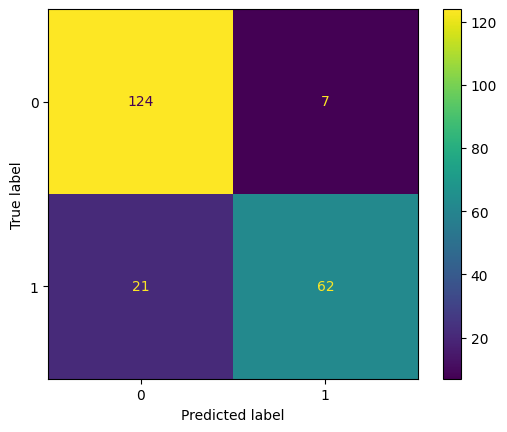

In [95]:
disp_gbs = ConfusionMatrixDisplay(confusion_matrix= conf_matrix_gbs)
disp_gbs.plot()

plt.show()

In [111]:
comparission = pd.DataFrame({
    'algorithm': ['KNN', 'NB', 'GBS'],
    'accuracy': [accuracy_knn, accuracy_nb, accuracy_gbs],
    'roc_auc': [roc_auc_knn, roc_auc_nb, roc_auc_gbs],
    'precision': [precission_knn, precission_nb, precission_gbs],
    'recall': [recall_knn, recall_nb, recall_gbs],
})
comparission

,algorithm,accuracy,roc_auc,precision,recall
0,KNN,0.822430,0.894647,0.826087,0.686747
1,NB,0.789720,0.888347,0.702128,0.795181
2,GBS,0.869159,0.942656,0.898551,0.746988
